# Introduction to TensorFlow in Python
#### Course Description
Not long ago, cutting-edge computer vision algorithms couldn’t differentiate between images of cats and dogs. Today, a skilled data scientist equipped with nothing more than a laptop can classify tens of thousands of objects with greater accuracy than the human eye. In this course, you will use TensorFlow 2.1 to develop, train, and make predictions with the models that have powered major advances in recommendation systems, image classification, and FinTech. You will learn both high-level APIs, which will enable you to design and train deep learning models in 15 lines of code, and low-level APIs, which will allow you to move beyond off-the-shelf routines. You will also learn to accurately predict housing prices, credit card borrower defaults, and images of sign language gestures.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

constant = tf.constant

# 1. Introduction to TensorFlow

Before you can build advanced models in TensorFlow 2.0, you will first need to understand the basics. In this chapter, you’ll learn how to define constants and variables, perform tensor addition and multiplication, and compute derivatives. Knowledge of linear algebra will be helpful, but not necessary.

### Defining data as constants
Throughout this course, we will use tensorflow version 2.1 and will exclusively import the submodules needed to complete each exercise. This will usually be done for you, but you will do it in this exercise by importing constant from tensorflow.

After you have imported constant, you will use it to transform a numpy array, credit_numpy, into a tensorflow constant, credit_constant. This array contains feature columns from a dataset on credit card holders and is previewed in the image below. We will return to this dataset in later chapters.

Note that tensorflow version 2.0 allows you to use data as either a numpy array or a tensorflow constant object. Using a constant will ensure that any operations performed with that object are done in tensorflow.

This image shows four feature columns from a dataset on credit card default: education, marriage, age, and bill amount.

#### Instructions

- Import the constant submodule from the tensorflow module.
- Convert the credit_numpy array into a constant object in tensorflow. Do not set the data type.

In [2]:
credit_numpy = pd.read_csv('data/uci_credit_card.csv').iloc[:,:4]
credit_numpy = credit_numpy.to_numpy()


In [3]:
# Convert the credit_numpy array into a tensorflow constant
credit_constant = constant(credit_numpy)

# Print constant datatype
print('The datatype is:', credit_constant.dtype)

# Print constant shape
print('The shape is:', credit_constant.shape)

The datatype is: <dtype: 'float64'>
The shape is: (30000, 4)


### Defining variables
Unlike a constant, a variable's value can be modified. This will be quite useful when we want to train a model by updating its parameters. Constants can't be used for this purpose, so variables are the natural choice.

Let's try defining and working with a variable. Note that Variable(), which is used to create a variable tensor, has been imported from tensorflow and is available to use in the exercise.

#### Instructions

- Define a variable, A1, as the 1-dimensional tensor: [1, 2, 3, 4].
- Print A1. Do not use the .numpy() method. What did this tell you?
- Apply .numpy() to A1 and assign it to B1.
- Print B1. What did this tell you?

In [4]:
Variable =  tf.Variable
# Define the 1-dimensional variable A1
A1 = Variable([1, 2, 3, 4])

# Print the variable A1
print(A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>
[1 2 3 4]


### Performing element-wise multiplication
Element-wise multiplication in TensorFlow is performed using two tensors with identical shapes. This is because the operation multiplies elements in corresponding positions in the two tensors. An example of an element-wise multiplication, denoted by the ⊙ symbol, is shown below:

$
\begin{bmatrix}
1&2 \\ 2&1 
\end{bmatrix} 
\odot
\begin{bmatrix}
3&2 \\ 1&5
\end{bmatrix} = 
\begin{bmatrix}
3 & 4 \\ 2 & 5
\end{bmatrix} 
$

In this exercise, you will perform element-wise multiplication, paying careful attention to the shape of the tensors you multiply. Note that multiply(), constant(), and ones_like() have been imported for you.

### Instructions

-  Define the tensors A1 and A23 as constants.
-  Set B1 to be a tensor of ones with the same shape as A1.
-  Set B23 to be a tensor of ones with the same shape as A23.
-  Set C1 and C23 equal to the element-wise products of A1 and B1, and A23 and B23, respectively.

In [5]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = tf.ones_like(A1)
B23 = tf.ones_like(A23)

# Perform element-wise multiplication
C1 = tf.multiply(A1,B1)
C23 = tf.multiply(A23,B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


### Making predictions with matrix multiplication
In later chapters, you will learn to train linear regression models. This process will yield a vector of parameters that can be multiplied by the input data to generate predictions. In this exercise, you will use input data, features, and a target vector, bill, which are taken from a credit card dataset we will use later in the course.

<img src="im1.JPG" width=200 />

The matrix of input data, features, contains two columns: education level and age. The target vector, bill, is the size of the credit card borrower's bill.

Since we have not trained the model, you will enter a guess for the values of the parameter vector, params. You will then use matmul() to perform matrix multiplication of features by params to generate predictions, billpred, which you will compare with bill. Note that we have imported matmul() and constant().

#### Instructions

- Define features, params, and bill as constants.
- Compute the predicted value vector, billpred, by multiplying the input data, features, by the parameters, params. Use matrix multiplication, rather than the element-wise product.
- Define error as the targets, bill, minus the predicted values, billpred.

In [6]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = tf.matmul(features,params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


### Reshaping tensors
Later in the course, you will classify images of sign language letters using a neural network. In some cases, the network will take 1-dimensional tensors as inputs, but your data will come in the form of images, which will either be either 2- or 3-dimensional tensors, depending on whether they are grayscale or color images.

The figure below shows grayscale and color images of the sign language letter A. The two images have been imported for you and converted to the numpy arrays gray_tensor and color_tensor. Reshape these arrays into 1-dimensional vectors using the reshape operation, which has been imported for you from tensorflow. Note that the shape of gray_tensor is 28x28 and the shape of color_tensor is 28x28x3.

This figure shows grayscale and color images of the sign language letter "A".

#### Instructions

- Reshape gray_tensor from a 28x28 matrix into a 784x1 vector named gray_vector.
- Reshape color_tensor from a 28x28x3 tensor into a 2352x1 vector named color_vector.

In [7]:
from arrays import *

NameError: name 'pd' is not defined

In [ ]:
# Reshape the grayscale image tensor into a vector
gray_vector = tf.reshape(gray_tensor, (784, 1))

# Reshape the color image tensor into a vector
color_vector = tf.reshape(color_tensor, (2352, 1))

### Optimizing with gradients
You are given a loss function, y=x2, which you want to minimize. You can do this by computing the slope using the GradientTape() operation at different values of x. If the slope is positive, you can decrease the loss by lowering x. If it is negative, you can decrease it by increasing x. This is how gradient descent works.

<img src="gradient_plot.png" width=300 />


The image shows a plot of y equals x squared. It also shows the gradient at x equals -1, x equals 0, and x equals 1.

In practice, you will use a high level tensorflow operation to perform gradient descent automatically. In this exercise, however, you will compute the slope at x values of -1, 1, and 0. The following operations are available: GradientTape(), multiply(), and Variable().

#### Instructions

- Define x as a variable with the initial value x0.
- Set the loss function, y, equal to x multiplied by x. Do not make use of operator overloading.
- Set the function to return the gradient of y with respect to x.
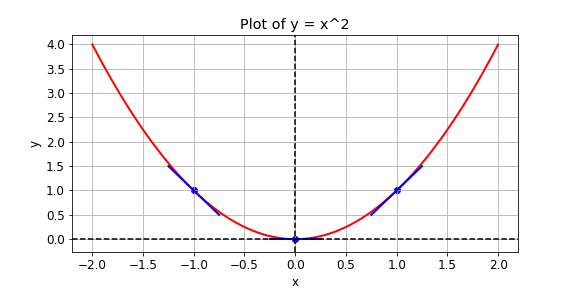

In [ ]:
def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = tf.Variable(x0)
	with tf.GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
		y = x*x
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

### Working with image data
You are given a black-and-white image of a letter, which has been encoded as a tensor, letter. You want to determine whether the letter is an X or a K. You don't have a trained neural network, but you do have a simple model, model, which can be used to classify letter.

The 3x3 tensor, letter, and the 1x3 tensor, model, are available in the Python shell. You can determine whether letter is a K by multiplying letter by model, summing over the result, and then checking if it is equal to 1. As with more complicated models, such as neural networks, model is a collection of weights, arranged in a tensor.

Note that the functions reshape(), matmul(), and reduce_sum() have been imported from tensorflow and are available for use.

#### Instructions

- The model, model, is 1x3 tensor, but should be a 3x1. Reshape model.
- Perform a matrix multiplication of the 3x3 tensor, letter, by the 3x1 tensor, model.
- Sum over the resulting tensor, output, and assign this value to prediction.
- Print prediction using the .numpy() method to determine whether letter is K.

In [10]:
letter = np.array([[1., 0., 1.], [1., 1., 0.], [1., 0., 1.]])
model = np.array([[ 1.,  0., -1.]])

In [11]:
# Reshape model from a 1x3 to a 3x1 tensor
model = tf.reshape(model, (3, 1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0


# 2. Linear models

In this chapter, you will learn how to build, solve, and make predictions with models in TensorFlow 2.0. You will focus on a simple class of models – the linear regression model – and will try to predict housing prices. By the end of the chapter, you will know how to load and manipulate data, construct loss functions, perform minimization, make predictions, and reduce resource use with batch training.

# 3. Neural Networks

The previous chapters taught you how to build models in TensorFlow 2.0. In this chapter, you will apply those same tools to build, train, and make predictions with neural networks. You will learn how to define dense layers, apply activation functions, select an optimizer, and apply regularization to reduce overfitting. You will take advantage of TensorFlow's flexibility by using both low-level linear algebra and high-level Keras API operations to define and train models.

# 4. High Level APIs

In the final chapter, you'll use high-level APIs in TensorFlow 2.0 to train a sign language letter classifier. You will use both the sequential and functional Keras APIs to train, validate, make predictions with, and evaluate models. You will also learn how to use the Estimators API to streamline the model definition and training process, and to avoid errors.